## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  43.040427  1333.309156  0.942343  9.112474  1.616845
1  83.014952  1658.181661  0.218847  5.975821  1.277703
2  47.103329   300.219511  0.336969  1.997947  1.103641
3   0.158490  1648.362864  0.588307  3.561439  1.546608
4  39.303156  1675.360302  0.411796  6.418656  1.589969


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0083546	total: 69.2ms	remaining: 1m 9s
1:	learn: 0.9997319	total: 69.7ms	remaining: 34.8s
2:	learn: 0.9915093	total: 70.2ms	remaining: 23.3s
3:	learn: 0.9832678	total: 70.8ms	remaining: 17.6s
4:	learn: 0.9739213	total: 71.3ms	remaining: 14.2s
5:	learn: 0.9639989	total: 71.8ms	remaining: 11.9s
6:	learn: 0.9547883	total: 72.3ms	remaining: 10.3s
7:	learn: 0.9448900	total: 72.9ms	remaining: 9.04s
8:	learn: 0.9367548	total: 73.4ms	remaining: 8.08s
9:	learn: 0.9267730	total: 73.9ms	remaining: 7.32s
10:	learn: 0.9193317	total: 74.4ms	remaining: 6.69s
11:	learn: 0.9085998	total: 75ms	remaining: 6.18s
12:	learn: 0.9018944	total: 75.5ms	remaining: 5.73s
13:	learn: 0.8920271	total: 76ms	remaining: 5.35s
14:	learn: 0.8833661	total: 76.5ms	remaining: 5.02s
15:	learn: 0.8766993	total: 76.9ms	remaining: 4.73s
16:	learn: 0.8676687	total: 77.3ms	remaining: 4.47s
17:	learn: 0.8595147	total: 77.7ms	remaining: 4.24s
18:	learn: 0.8529751	total: 78.2ms	remaining: 4.

95:	learn: 0.4732803	total: 108ms	remaining: 1.02s
96:	learn: 0.4700873	total: 109ms	remaining: 1.01s
97:	learn: 0.4667465	total: 109ms	remaining: 1.01s
98:	learn: 0.4643782	total: 110ms	remaining: 1000ms
99:	learn: 0.4614116	total: 110ms	remaining: 994ms
100:	learn: 0.4590205	total: 111ms	remaining: 986ms
101:	learn: 0.4558084	total: 111ms	remaining: 980ms
102:	learn: 0.4533128	total: 112ms	remaining: 973ms
103:	learn: 0.4510771	total: 112ms	remaining: 966ms
104:	learn: 0.4494694	total: 113ms	remaining: 959ms
105:	learn: 0.4470563	total: 113ms	remaining: 952ms
106:	learn: 0.4439567	total: 113ms	remaining: 946ms
107:	learn: 0.4414720	total: 114ms	remaining: 939ms
108:	learn: 0.4392771	total: 114ms	remaining: 934ms
109:	learn: 0.4366517	total: 115ms	remaining: 929ms
110:	learn: 0.4338336	total: 115ms	remaining: 923ms
111:	learn: 0.4315663	total: 116ms	remaining: 918ms
112:	learn: 0.4294486	total: 116ms	remaining: 912ms
113:	learn: 0.4271494	total: 117ms	remaining: 907ms
114:	learn: 0.42

280:	learn: 0.2306420	total: 187ms	remaining: 477ms
281:	learn: 0.2303657	total: 187ms	remaining: 476ms
282:	learn: 0.2300758	total: 187ms	remaining: 475ms
283:	learn: 0.2297815	total: 188ms	remaining: 473ms
284:	learn: 0.2294397	total: 188ms	remaining: 472ms
285:	learn: 0.2282726	total: 189ms	remaining: 471ms
286:	learn: 0.2279506	total: 189ms	remaining: 470ms
287:	learn: 0.2273504	total: 189ms	remaining: 468ms
288:	learn: 0.2270419	total: 190ms	remaining: 467ms
289:	learn: 0.2267306	total: 190ms	remaining: 466ms
290:	learn: 0.2262076	total: 191ms	remaining: 464ms
291:	learn: 0.2258760	total: 191ms	remaining: 463ms
292:	learn: 0.2250922	total: 191ms	remaining: 462ms
293:	learn: 0.2243427	total: 192ms	remaining: 461ms
294:	learn: 0.2238031	total: 192ms	remaining: 460ms
295:	learn: 0.2235652	total: 193ms	remaining: 459ms
296:	learn: 0.2232497	total: 193ms	remaining: 458ms
297:	learn: 0.2229389	total: 194ms	remaining: 457ms
298:	learn: 0.2226228	total: 194ms	remaining: 455ms
299:	learn: 

517:	learn: 0.1156786	total: 290ms	remaining: 270ms
518:	learn: 0.1151795	total: 290ms	remaining: 269ms
519:	learn: 0.1149372	total: 291ms	remaining: 268ms
520:	learn: 0.1143434	total: 291ms	remaining: 268ms
521:	learn: 0.1138608	total: 292ms	remaining: 267ms
522:	learn: 0.1137843	total: 292ms	remaining: 266ms
523:	learn: 0.1135495	total: 293ms	remaining: 266ms
524:	learn: 0.1131430	total: 293ms	remaining: 265ms
525:	learn: 0.1125503	total: 293ms	remaining: 264ms
526:	learn: 0.1120793	total: 294ms	remaining: 264ms
527:	learn: 0.1118528	total: 294ms	remaining: 263ms
528:	learn: 0.1112751	total: 295ms	remaining: 263ms
529:	learn: 0.1110548	total: 295ms	remaining: 262ms
530:	learn: 0.1109818	total: 296ms	remaining: 261ms
531:	learn: 0.1104266	total: 296ms	remaining: 261ms
532:	learn: 0.1102130	total: 297ms	remaining: 260ms
533:	learn: 0.1096562	total: 297ms	remaining: 259ms
534:	learn: 0.1092776	total: 298ms	remaining: 259ms
535:	learn: 0.1090110	total: 298ms	remaining: 258ms
536:	learn: 

695:	learn: 0.0701460	total: 368ms	remaining: 161ms
696:	learn: 0.0699196	total: 369ms	remaining: 160ms
697:	learn: 0.0697912	total: 369ms	remaining: 160ms
698:	learn: 0.0695967	total: 370ms	remaining: 159ms
699:	learn: 0.0693766	total: 370ms	remaining: 159ms
700:	learn: 0.0691879	total: 371ms	remaining: 158ms
701:	learn: 0.0689803	total: 371ms	remaining: 158ms
702:	learn: 0.0687673	total: 372ms	remaining: 157ms
703:	learn: 0.0685647	total: 372ms	remaining: 156ms
704:	learn: 0.0684405	total: 372ms	remaining: 156ms
705:	learn: 0.0683182	total: 373ms	remaining: 155ms
706:	learn: 0.0681109	total: 373ms	remaining: 155ms
707:	learn: 0.0678855	total: 373ms	remaining: 154ms
708:	learn: 0.0677650	total: 374ms	remaining: 153ms
709:	learn: 0.0675555	total: 374ms	remaining: 153ms
710:	learn: 0.0673624	total: 375ms	remaining: 152ms
711:	learn: 0.0671654	total: 375ms	remaining: 152ms
712:	learn: 0.0669502	total: 376ms	remaining: 151ms
713:	learn: 0.0668315	total: 376ms	remaining: 151ms
714:	learn: 

932:	learn: 0.0419166	total: 472ms	remaining: 33.9ms
933:	learn: 0.0418434	total: 473ms	remaining: 33.4ms
934:	learn: 0.0417322	total: 473ms	remaining: 32.9ms
935:	learn: 0.0416818	total: 473ms	remaining: 32.4ms
936:	learn: 0.0416201	total: 474ms	remaining: 31.9ms
937:	learn: 0.0415704	total: 475ms	remaining: 31.4ms
938:	learn: 0.0415015	total: 475ms	remaining: 30.9ms
939:	learn: 0.0414312	total: 475ms	remaining: 30.3ms
940:	learn: 0.0413822	total: 476ms	remaining: 29.8ms
941:	learn: 0.0413016	total: 476ms	remaining: 29.3ms
942:	learn: 0.0412117	total: 477ms	remaining: 28.8ms
943:	learn: 0.0411523	total: 477ms	remaining: 28.3ms
944:	learn: 0.0410968	total: 477ms	remaining: 27.8ms
945:	learn: 0.0410082	total: 478ms	remaining: 27.3ms
946:	learn: 0.0409401	total: 478ms	remaining: 26.8ms
947:	learn: 0.0408617	total: 479ms	remaining: 26.3ms
948:	learn: 0.0407745	total: 479ms	remaining: 25.7ms
949:	learn: 0.0406228	total: 480ms	remaining: 25.2ms
950:	learn: 0.0405148	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

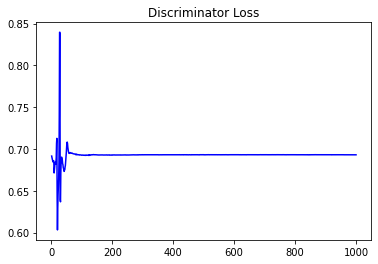

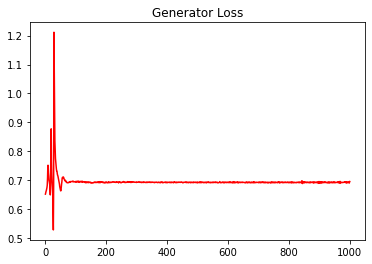

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.19715959859081963


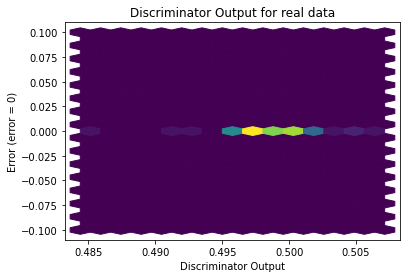

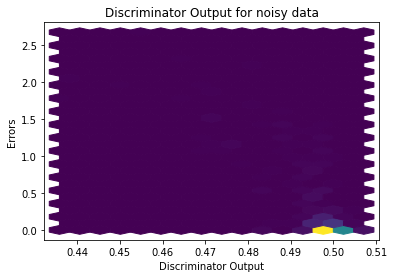

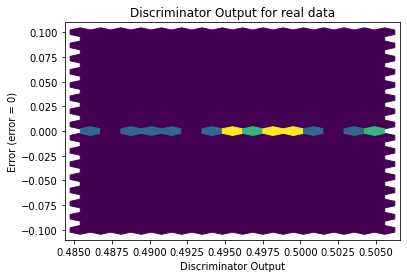

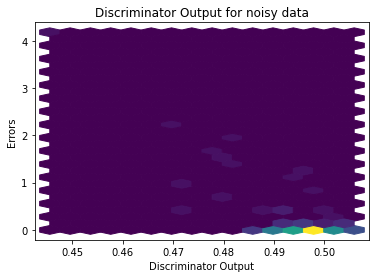

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


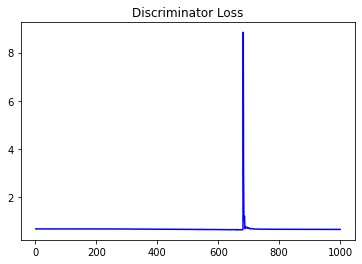

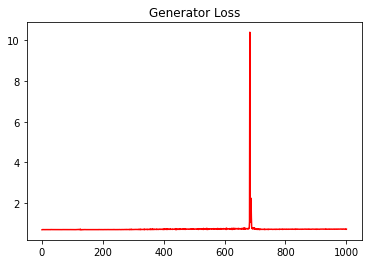

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2000294736896876


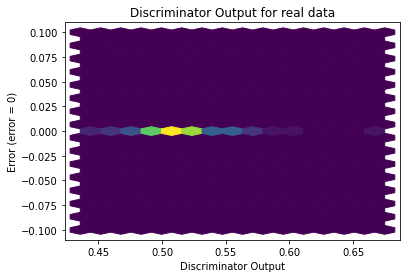

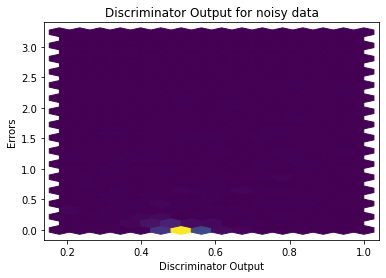

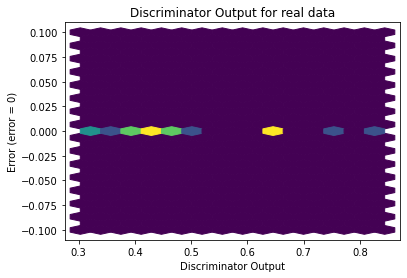

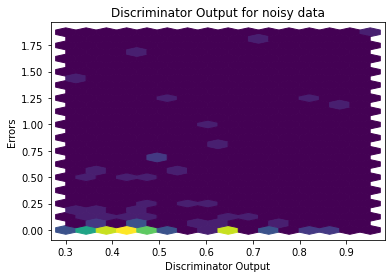

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
